## MRA MILESTONE 2

A Grocery Store shared the transactional data with you. Your job is to identify the most popular combos that can be suggested to the Grocery Store chain after a thorough analysis of the most commonly occurring sets of menu items in the customer orders. The Store doesn’t have any combo meals. Can you suggest the best combo meals?

In [2]:
pip install mlxtend


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [8]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from warnings import filterwarnings
filterwarnings("ignore")

#### LOAD DATA

In [9]:
df=pd.read_csv('dataset_group.csv')

In [33]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [13]:
df.duplicated().sum()

4730

In [15]:
df['Product'] = df['Product'].str.lower()

In [16]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


In [17]:
df = df.drop(df[df.Product == 'none'].index)

In [18]:
df

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
...,...,...,...
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent


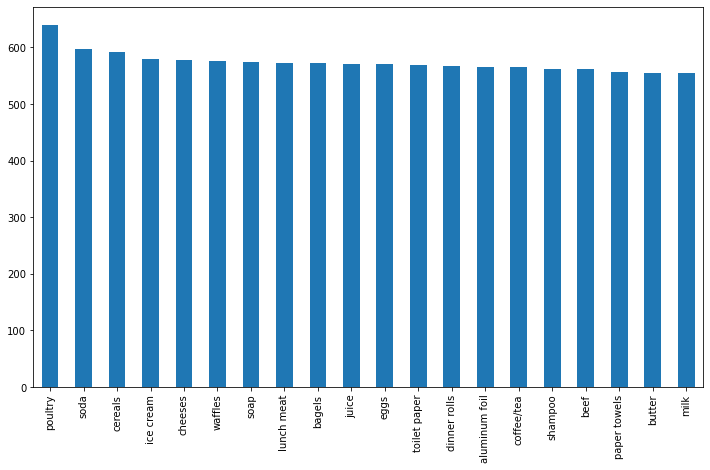

In [19]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [22]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [23]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [24]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [25]:
basket=basket.applymap(encode_zero_one)

#### Find the support for itemsets using Apriori

In [28]:
itemsets = apriori(basket, min_support = 0.03, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
42037,0.030729,"(laundry detergent, spaghetti sauce, juice, di..."
42038,0.033363,"(paper towels, eggs, dishwashing liquid/deterg..."
42039,0.030729,"(eggs, dishwashing liquid/detergent, ice cream..."
42040,0.030729,"(lunch meat, paper towels, eggs, ice cream, pa..."


#### Visualizing the Support of itemsets



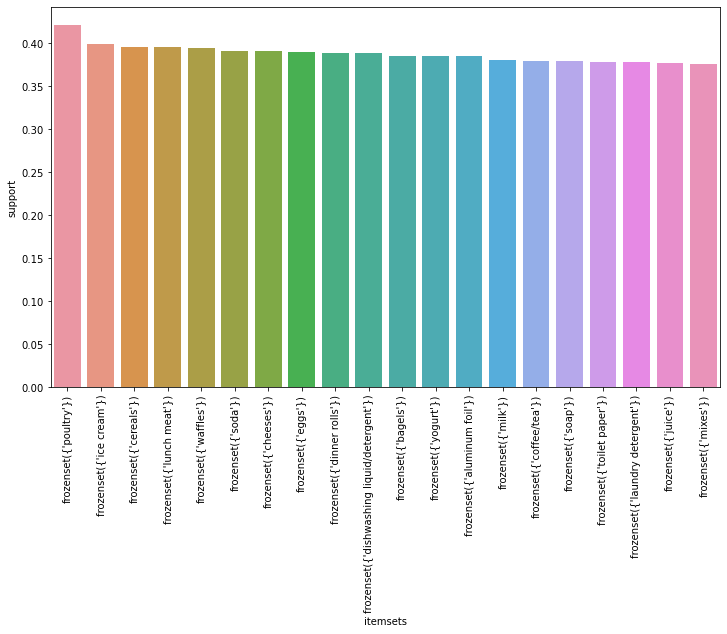

In [29]:

plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

#### Check the rules using association_rules

In [30]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [31]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
517850,"(dishwashing liquid/detergent, soda, cheeses)","(waffles, flour)",0.077261,0.144864,0.030729,0.397727,2.745523,0.019536,1.419849
517851,"(waffles, flour)","(dishwashing liquid/detergent, soda, cheeses)",0.144864,0.077261,0.030729,0.212121,2.745523,0.019536,1.171169
517995,"(eggs, lunch meat, pasta)","(paper towels, ice cream)",0.065847,0.170325,0.030729,0.466667,2.739863,0.019513,1.555641
518006,"(paper towels, ice cream)","(eggs, lunch meat, pasta)",0.170325,0.065847,0.030729,0.180412,2.739863,0.019513,1.139784
518008,"(eggs, ice cream)","(paper towels, lunch meat, pasta)",0.166813,0.068481,0.030729,0.184211,2.689946,0.019305,1.141862
517993,"(paper towels, lunch meat, pasta)","(eggs, ice cream)",0.068481,0.166813,0.030729,0.448718,2.689946,0.019305,1.511362
518030,"(poultry, pasta, ice cream)","(eggs, paper towels)",0.071993,0.165935,0.031607,0.439024,2.645761,0.019661,1.486811
518031,"(eggs, paper towels)","(poultry, pasta, ice cream)",0.165935,0.071993,0.031607,0.190476,2.645761,0.019661,1.146362
517996,"(pasta, lunch meat, ice cream)","(eggs, paper towels)",0.070237,0.165935,0.030729,0.437500,2.636574,0.019074,1.482782
518005,"(eggs, paper towels)","(pasta, lunch meat, ice cream)",0.165935,0.070237,0.030729,0.185185,2.636574,0.019074,1.141073


### Interpretations
The grocery store can provide some combo offer for dishwashing liquid/detergent, soda, cheeses and waffles, flour as they have good lift. The combination of eggs, lunch meat, pasta can also be thought of.

1.Ice cream, waffles and bagels with 15% discount on dessert combo

2.Buy one get one offer can be provided on buying dishwashing detergent along with laundry detergent.

3.Cashback can provided for customers.

4.Gift vouchers can be provided for customers buying product above 2000.

5.Free delivery can be done for customers buying products above 1000.

6.As people are interested in poultry product, free can be provided such as egg, cheese etc.
